In [1]:
import pandas as pd
import numpy as np
import ast
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ads = pd.read_csv("train_data_ads.csv")
feeds = pd.read_csv("train_data_feeds.csv")

print("Ads shape:", ads.shape)
print("Ads Columns:", ads.columns)
print("Feeds shape:", feeds.shape)
print("Feeds Columns:", feeds.columns)

Ads shape: (7675517, 35)
Ads Columns: Index(['log_id', 'label', 'user_id', 'age', 'gender', 'residence', 'city',
       'city_rank', 'series_dev', 'series_group', 'emui_dev', 'device_name',
       'device_size', 'net_type', 'task_id', 'adv_id', 'creat_type_cd',
       'adv_prim_id', 'inter_type_cd', 'slot_id', 'site_id', 'spread_app_id',
       'hispace_app_tags', 'app_second_class', 'app_score',
       'ad_click_list_v001', 'ad_click_list_v002', 'ad_click_list_v003',
       'ad_close_list_v001', 'ad_close_list_v002', 'ad_close_list_v003',
       'pt_d', 'u_newsCatInterestsST', 'u_refreshTimes', 'u_feedLifeCycle'],
      dtype='object')
Feeds shape: (1048575, 28)
Feeds Columns: Index(['u_userId', 'u_phonePrice', 'u_browserLifeCycle', 'u_browserMode',
       'u_feedLifeCycle', 'u_refreshTimes', 'u_newsCatInterests',
       'u_newsCatDislike', 'u_newsCatInterestsST', 'u_click_ca2_news',
       'i_docId', 'i_s_sourceId', 'i_regionEntity', 'i_cat', 'i_entities',
       'i_dislikeTimes', 'i

In [9]:
ads.head(5)

,log_id,label,user_id,age,gender,residence,city,city_rank,series_dev,series_group,...,ad_click_list_v001,ad_click_list_v002,ad_click_list_v003,ad_close_list_v001,ad_close_list_v002,ad_close_list_v003,pt_d,u_newsCatInterestsST,u_refreshTimes,u_feedLifeCycle
0,373250,0,100005,3,2,16,147,2,32,6,...,30157^30648^14278^31706,2066^1776^1036,114^219^312,24107,1218,173,202206030326,39^220^16,0,15
1,373253,1,100005,3,2,16,147,2,32,6,...,30157^30648^14278^31706,2066^1776^1036,114^219^312,24107,1218,173,202206030326,39^220^16,0,15
2,373252,1,100005,3,2,16,147,2,32,6,...,30157^30648^14278^31706,2066^1776^1036,114^219^312,24107,1218,173,202206030326,39^220^16,0,15
3,373251,0,100005,3,2,16,147,2,32,6,...,30157^30648^14278^31706,2066^1776^1036,114^219^312,24107,1218,173,202206030326,39^220^16,0,15
4,373255,0,100005,3,2,16,147,2,32,6,...,30157^30648^14278^31706,2066^1776^1036,114^219^312,24107,1218,173,202206030328,39^220^16,0,15


In [10]:
feeds.head(5)

,u_userId,u_phonePrice,u_browserLifeCycle,u_browserMode,u_feedLifeCycle,u_refreshTimes,u_newsCatInterests,u_newsCatDislike,u_newsCatInterestsST,u_click_ca2_news,...,e_ch,e_m,e_po,e_pl,e_rn,e_section,e_et,label,cillabel,pro
0,135880,16,17,10,17,0,195^168^109^98^108,0,195^44^168^112^21,195^168^44^112^21,...,19,1217,1,561,2,0,2.022060e+11,-1,-1,0
1,135880,16,17,10,17,0,195^168^109^98^108,0,195^44^168^112^21,195^168^44^112^21,...,19,1217,9,561,1,0,2.022060e+11,-1,-1,0
2,135880,16,17,10,17,0,195^168^109^98^108,0,195^44^168^112^21,195^168^44^112^21,...,19,1217,18,561,1,0,2.022060e+11,-1,-1,0
3,135880,16,17,10,17,0,195^168^109^98^108,0,195^44^168^112^21,195^168^44^112^21,...,19,1217,7,561,1,1,2.022060e+11,-1,-1,0
4,135880,16,17,10,17,0,195^168^109^98^108,0,195^44^168^112^21,195^168^44^112^21,...,19,1217,7,561,2,0,2.022060e+11,-1,-1,0


In [3]:
print("Label distribution BEFORE removing non-click users:")
print(ads["label"].value_counts())
print("\nPercentage distribution:")
print(ads["label"].value_counts(normalize=True) * 100)

Label distribution BEFORE removing non-click users:
label
0    7556381
1     119136
Name: count, dtype: int64

Percentage distribution:
label
0    98.447844
1     1.552156
Name: proportion, dtype: float64


In [ ]:
#Remove rows where user never clicks (based on label == 0)
clicking_user_ids = ads[ads['label'] == 1]['user_id'].unique()
ads=ads[ads['user_id'].isin(clicking_user_ids)].copy()
print("After removing non-click rows:", ads.shape)

After removing non-click rows: (7363912, 35)


In [5]:
print("Label distribution AFTER removing non-clicks:")
print(ads["label"].value_counts())
print("\nPercentage distribution:")
print(ads["label"].value_counts(normalize=True) * 100)

Label distribution AFTER removing non-clicks:
label
0    7244776
1     119136
Name: count, dtype: int64

Percentage distribution:
label
0    98.382164
1     1.617836
Name: proportion, dtype: float64


In [6]:
# creat_type_cd count table
count_table = ads.groupby('creat_type_cd')['label'].value_counts().unstack(fill_value=0)

# percentage table
pct_table = ads.groupby('creat_type_cd')['label'].value_counts(normalize=True).unstack(fill_value=0) * 100

# combine both: counts + percentages side by side
summary_table = pd.concat(
    [count_table.add_suffix('_count'),
     pct_table.add_suffix('_pct')],
    axis=1
)

summary_table

label,0_count,1_count,0_pct,1_pct
creat_type_cd,,,,
2,145376,1864,98.734040,1.265960
3,340450,6481,98.131905,1.868095
4,73130,824,98.885794,1.114206
5,459639,7582,98.377213,1.622787
6,23245,3170,87.999243,12.000757
7,266622,3052,98.868263,1.131737
8,3906818,90437,97.737522,2.262478
9,14835,299,98.024316,1.975684
10,2014661,5427,99.731348,0.268652


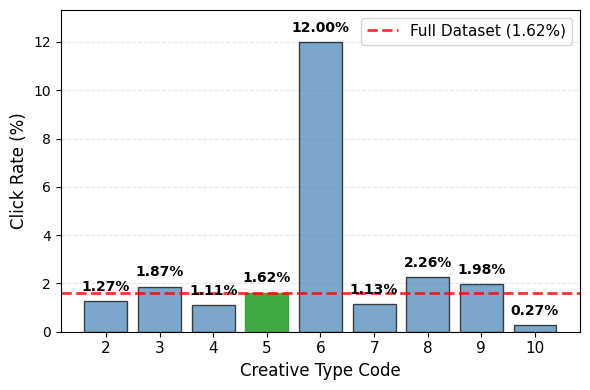


Click rates by creative type:
creat_type_cd
2      1.265960
3      1.868095
4      1.114206
5      1.622787
6     12.000757
7      1.131737
8      2.262478
9      1.975684
10     0.268652
Name: click_rate, dtype: float64


In [ ]:
# Compare all creative types
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

creat_stats = ads.groupby('creat_type_cd')['label'].agg(['sum', 'count'])
creat_stats['click_rate'] = (creat_stats['sum'] / creat_stats['count']) * 100
creat_stats = creat_stats.sort_index()

# Add full dataset as reference
full_click_rate_val = (ads['label'].sum() / len(ads)) * 100

x = np.arange(len(creat_stats))
bars = ax.bar(x, creat_stats['click_rate'], color='steelblue', alpha=0.7, edgecolor='black')

# Highlight creative type 5
bars[3].set_color('#2ca02c')  
bars[3].set_alpha(0.9)

# Add horizontal line for full dataset click rate
ax.axhline(y=full_click_rate_val, color='red', linestyle='--', linewidth=2, 
           label=f'Full Dataset ({full_click_rate_val:.2f}%)', alpha=0.8)

# Add value labels
for i, (idx, row) in enumerate(creat_stats.iterrows()):
    ax.text(i, row['click_rate'] + 0.3, f"{row['click_rate']:.2f}%", 
            ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xlabel('Creative Type Code', fontsize=12,)
ax.set_ylabel('Click Rate (%)', fontsize=12,)
#ax.set_title('Click Rate Distribution Across Creative Types', fontsize=14, pad=6)
ax.set_xticks(x)
ax.set_xticklabels(creat_stats.index, fontsize=11)
ax.legend(loc='upper right', fontsize=11)
ax.set_ylim(0, max(creat_stats['click_rate']) * 1.11)
ax.yaxis.grid(True, linestyle='--', alpha=0.3)
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('all_creat_types_comparison.pdf', dpi=300, bbox_inches='tight')
plt.show()

print("\nClick rates by creative type:")
print(creat_stats['click_rate'])

In [8]:
newads5=ads[ads['creat_type_cd']==5]
print("Label distribution for creat_type_5 only:")
print(newads5["label"].value_counts())
print("\nPercentage distribution:")
print(newads5["label"].value_counts(normalize=True) * 100)

Label distribution for creat_type_5 only:
label
0    459639
1      7582
Name: count, dtype: int64

Percentage distribution:
label
0    98.377213
1     1.622787
Name: proportion, dtype: float64
